<a href="https://colab.research.google.com/github/ErSKS/Colab/blob/main/11_PTL_InceptionV3_ErSKS_Cat_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import required libraries

In [ ]:
import sys
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.models import load_model
from keras.applications.inception_v3 import preprocess_input

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Set Target Size of the image

In [ ]:
target_size = (224, 224)

Define a function to convert target image into numpy array, then process to fit the model and use that output to make prediction

In [ ]:
def predict(model, img, target_size):
  """Run model prediction on image
  Args:
    model: keras model
    img: PIL format image
    target_size: (w,h) tuple
  Returns:
    list of predicted labels and their probabilities
  """
  if img.size != target_size:
    img = img.resize(target_size)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  classes = preds.argmax(axis=-1)
  return preds[0], classes

Plot the prediction in graph

In [ ]:
def plot_preds(image, preds):
  """Displays image and the top-n predicted probabilities in a bar graph
  Args:
    image: PIL image
    preds: list of predicted labels and their probabilities
  """
  plt.imshow(image)
  plt.axis('off')

  plt.figure()
  labels = ("marker", "stapler")
  plt.barh([0, 1], preds, alpha=0.5)
  plt.yticks([0, 1], labels)
  plt.xlabel('Probability')
  plt.xlim(0,1.01)
  plt.tight_layout()
  plt.show()

Load the model from the disk

In [ ]:
model = load_model("finetune_workshop_ersks_1.model")

Load image from disk

In [ ]:
image_location = "MyData/other/3 (11).jpg"

In [ ]:
img = Image.open(image_location)

Make prediction and keep result in a variable

In [ ]:
preds, classes = predict(model, img, target_size)

In [ ]:
classes

array([0], dtype=int64)

Plot the prediction with the image

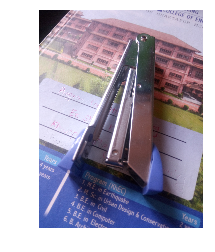

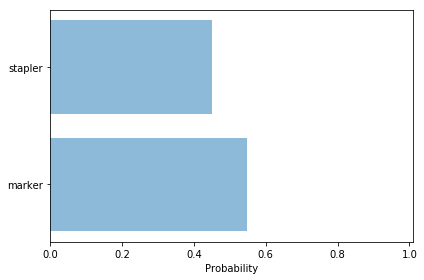

In [ ]:
plot_preds(img, preds)